<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/muinar07_act1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image-2.png](attachment:image-2.png)
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Técnicas de agrupamiento

## Objetivos

- Entender los métodos de clustering K-means, jerárquico y DBSCAN.
- Generar agrupamientos con los métodos de clustering previamente indicados y realizar una comparativa.
- Investigar sobre una técnica de agrupamiento con un caso de uso concreto.


## Descripción de la actividad

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este conjunto de datos contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

### Tareas a realizar
- Clustering
  - Debes completar el código pedido en este notebook y contestar las preguntas finales.
  - Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de técnicas de agrupamiento. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para cada artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección de anomalías.
    - Técnicas de detección de anomalías empleadas.
    - Principales resultados de la aplicación y de la investigación.


#### Nombre del estudiante

In [ ]:
# HAROL ESTEVEZ

### Clustering

Comenzamos importando las librerías necesarias y cargando el dataset.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, contiene una etiqueta de si tiene fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados
df = pd.read_csv('/content/muinar07_act1_data.csv', sep=',')

#### ¿Cuántas instancias tiene el dataset?

In [2]:
num_instancias = df.shape[0]
print(f"El dataset tiene {num_instancias} instancias.")

El dataset tiene 944 instancias.


#### ¿Cuál es el tipo de datos predominante en el dataset?

In [3]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Contar la frecuencia de cada tipo de dato
frecuencia_tipos = tipos_de_datos.value_counts()

print("Tipos de datos en el dataset y su frecuencia:")
print(frecuencia_tipos)

# Para ver el tipo de dato más común (predominante)
tipo_predominante = frecuencia_tipos.idxmax()
print(f"\nEl tipo de dato predominante es: {tipo_predominante}")

Tipos de datos en el dataset y su frecuencia:
int64    10
Name: count, dtype: int64

El tipo de dato predominante es: int64


#### ¿Son variables continuas o categóricas?

#_indica aquí tu respuesta_

#### ¿cuáles son los valores mínimo y máximo de la variable 'RP'?

In [4]:
# Imprimir algunas estadísticas descriptivas básicas
print("Estadísticas descriptivas:")
print(df.describe(include='all'))

print("\nNúmero de valores únicos por columna:")
for columna in df.columns:
    print(f"{columna}: {df[columna].nunique()} valores únicos")
    if df[columna].nunique() < 20:
        print(f"  Valores: {df[columna].unique()}")

print(f"\nValores únicos para 'tempMode': {df['tempMode'].unique()}")
print(f"Número de valores únicos para 'tempMode': {df['tempMode'].nunique()}")

Estadísticas descriptivas:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000

#### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

#_indica aquí tu respuesta_

In [6]:
# Verificar datos faltantes por columna
datos_faltantes_por_columna = df.isnull().sum()

# Verificar si hay algún dato faltante en todo el DataFrame
hay_datos_faltantes = df.isnull().values.any()

print("Datos faltantes por columna:")
print(datos_faltantes_por_columna)
print(f"\n Dato faltante en el dataset? {hay_datos_faltantes}")

Datos faltantes por columna:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

 Dato faltante en el dataset? False


#### Elimine la variable fail

In [7]:
# Eliminar la columna 'fail'
df = df.drop('fail', axis=1)

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

In [8]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia del escalador
scaler = StandardScaler()
columnas_a_escalar = df.columns
df_scaled_array = scaler.fit_transform(df[columnas_a_escalar])

# Convertir el array escalado de nuevo a un DataFrame (opcional, pero útil)
df_scaled = pd.DataFrame(df_scaled_array, columns=columnas_a_escalar, index=df.index)

## K-Means

Crea 10 modelos de KMeans y entrénalos. Haciendo uso del método indicado para saber el número ideal de clústeres.

Ahora toca interpretar lo que Kmeans ha realizado. Recordemos que el objetivo de KMeans es encontrar patrones en los datos.

Lo primero que vamos a realizar es un gráfico para visualizar los clústers que ha creado con base en las variables utilizadas para crearlos.

Usando la variable X existente para el clustering.

Calculando WCSS para diferentes números de clústeres (k):
  WCSS para k=1: 8495.999999999993
  WCSS para k=2: 7056.20417648406
  WCSS para k=3: 6108.321738415004
  WCSS para k=4: 5376.180411754739
  WCSS para k=5: 4819.498216979747
  WCSS para k=6: 4469.256318553077
  WCSS para k=7: 4197.275345179024
  WCSS para k=8: 3991.1741490306754
  WCSS para k=9: 3819.4464944257047
  WCSS para k=10: 3687.736500215032


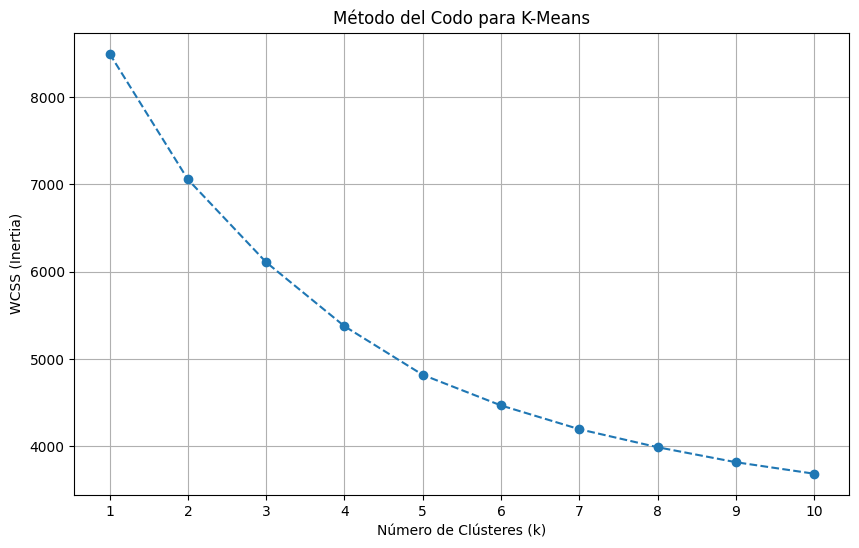


Basado en el método del codo, se ha elegido k_optimo = 3

Modelo K-Means entrenado con 3 clústeres.


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


if 'df_scaled' not in locals() and 'X' not in locals():
    print("Escalando datos...")
    scaler = StandardScaler()
    columnas_a_escalar = df.columns
    df_scaled_array = scaler.fit_transform(df[columnas_a_escalar])
    X = pd.DataFrame(df_scaled_array, columns=columnas_a_escalar, index=df.index)
    print("Datos escalados y guardados en la variable X.")
else:
    if 'X' in locals():
        print("Usando la variable X existente para el clustering.")
    elif 'df_scaled' in locals():
        X = df_scaled
        print("Usando la variable df_scaled existente y asignándola a X para el clustering.")
    else:
        print("Error: No se encontraron datos escalados (X o df_scaled).")
        raise NameError("Datos escalados (X o df_scaled) no definidos.")

# --- 1. Determinar el número ideal de clústeres
wcss = []
k_values = range(1, 11)

print("\nCalculando WCSS para diferentes números de clústeres (k):")
for k in k_values:
    kmeans_model_iter = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_model_iter.fit(X)
    wcss.append(kmeans_model_iter.inertia_)
    print(f"  WCSS para k={k}: {kmeans_model_iter.inertia_}")

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# --- 2. Elegir k y entrenar el modelo K-Means final
print(f"\nBasado en el método del codo, se ha elegido k_optimo = {k_optimo}")

# Entrenar el modelo final de KMeans con el k óptimo
kmeansmodel = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42, n_init=10)
kmeansmodel.fit(X)

print(f"\nModelo K-Means entrenado con {k_optimo} clústeres.")

# --- 3. Visualizar los clústeres (Gráfico Polar)
# El código que proporcionaste para el gráfico polar
clusters = pd.DataFrame(X.values, columns=X.columns)
clusters['label'] = kmeansmodel.labels_

polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])

fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True, height=800, width=1000)
fig4.update_layout(title_text=f'Características de los Clústeres (k={k_optimo}) - Valores Escalados', title_x=0.5)
fig4.show()

## DBSCAN

Usando la variable X existente (datos escalados) para DBSCAN.

Dimensionalidad de los datos (número de características): 9
Min_samples recomendado (2 * dimensionalidad): 18
Min_samples elegido para el k-distance plot: 18

Calculando distancias para el gráfico de k-distancia...


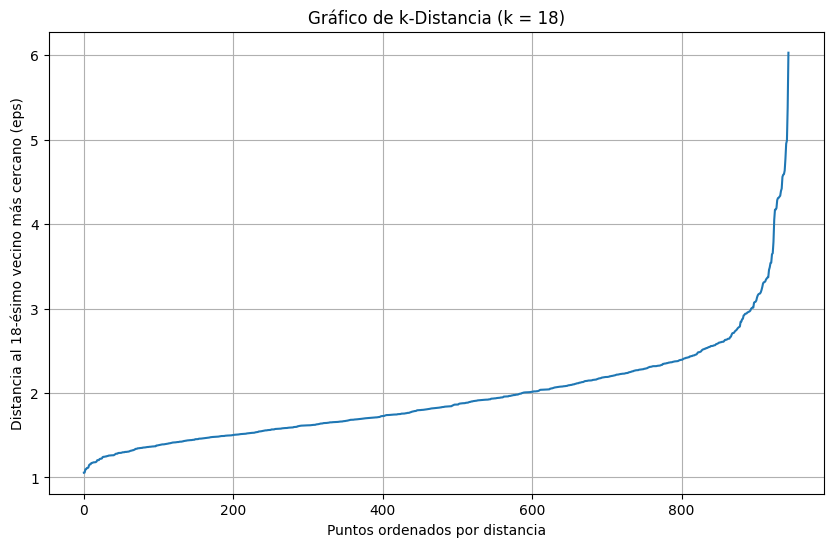


Hiperparámetros elegidos para DBSCAN:
  eps: 1.5
  min_samples: 18

Modelo DBSCAN entrenado.
Número estimado de clústeres: 1
Número estimado de puntos de ruido/outliers: 483

Visualizando clústeres de DBSCAN usando las variables: 'footfall' y 'tempMode'


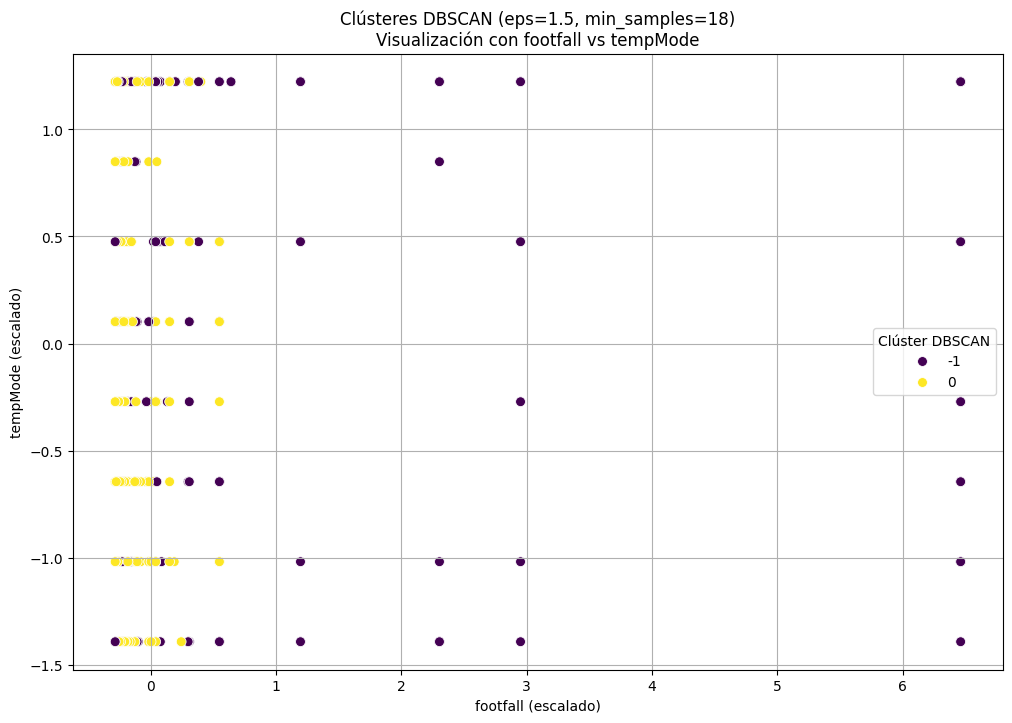

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'X' not in locals():
    print("ERROR: La variable 'X' con los datos escalados no está definida.")
    print("Asegúrate de haber ejecutado el preprocesamiento y escalado de datos en celdas anteriores.")
    print("Por ejemplo, X = df_scaled")
    raise NameError("Variable X no definida. Ejecuta el escalado de datos primero.")
else:
    print("Usando la variable X existente (datos escalados) para DBSCAN.")


# --- 1. Búsqueda de Hiperparámetros

dimensionalidad = X.shape[1]
min_samples_recomendado = 2 * dimensionalidad
print(f"\nDimensionalidad de los datos (número de características): {dimensionalidad}")
print(f"Min_samples recomendado (2 * dimensionalidad): {min_samples_recomendado}")
min_samples_elegido = min_samples_recomendado
print(f"Min_samples elegido para el k-distance plot: {min_samples_elegido}")

print("\nCalculando distancias para el gráfico de k-distancia...")
neighbors = NearestNeighbors(n_neighbors=min_samples_elegido)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

k_distances = np.sort(distances[:, min_samples_elegido-1], axis=0)

# Graficar las k-distancias
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'Gráfico de k-Distancia (k = {min_samples_elegido})')
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel(f"Distancia al {min_samples_elegido}-ésimo vecino más cercano (eps)")
plt.grid(True)
plt.show()

# --- 2. Entrenar el algoritmo DBSCAN con los hiperparámetros

eps_elegido = 1.5

print(f"\nHiperparámetros elegidos para DBSCAN:")
print(f"  eps: {eps_elegido}")
print(f"  min_samples: {min_samples_elegido}")

dbscan_model = DBSCAN(eps=eps_elegido, min_samples=min_samples_elegido)
dbscan_model.fit(X)

labels_dbscan = dbscan_model.labels_

n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)

print(f"\nModelo DBSCAN entrenado.")
print(f'Número estimado de clústeres: {n_clusters_}')
print(f'Número estimado de puntos de ruido/outliers: {n_noise_}')


# --- 3. Elegir dos variables para visualizar los clústeres
df_dbscan_plot = X.copy()
df_dbscan_plot['cluster_dbscan'] = labels_dbscan

variable_x_plot = X.columns[0]
variable_y_plot = X.columns[1]

print(f"\nVisualizando clústeres de DBSCAN usando las variables: '{variable_x_plot}' y '{variable_y_plot}'")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_dbscan_plot, x=variable_x_plot, y=variable_y_plot, hue='cluster_dbscan', palette='viridis', s=50)
plt.title(f'Clústeres DBSCAN (eps={eps_elegido}, min_samples={min_samples_elegido})\nVisualización con {variable_x_plot} vs {variable_y_plot}')
plt.xlabel(f"{variable_x_plot} (escalado)")
plt.ylabel(f"{variable_y_plot} (escalado)")
plt.legend(title='Clúster DBSCAN')
plt.grid(True)
plt.show()

## Dendrograma

Usando la variable X existente (datos escalados) para Clustering Jerárquico.

Generando el dendrograma...


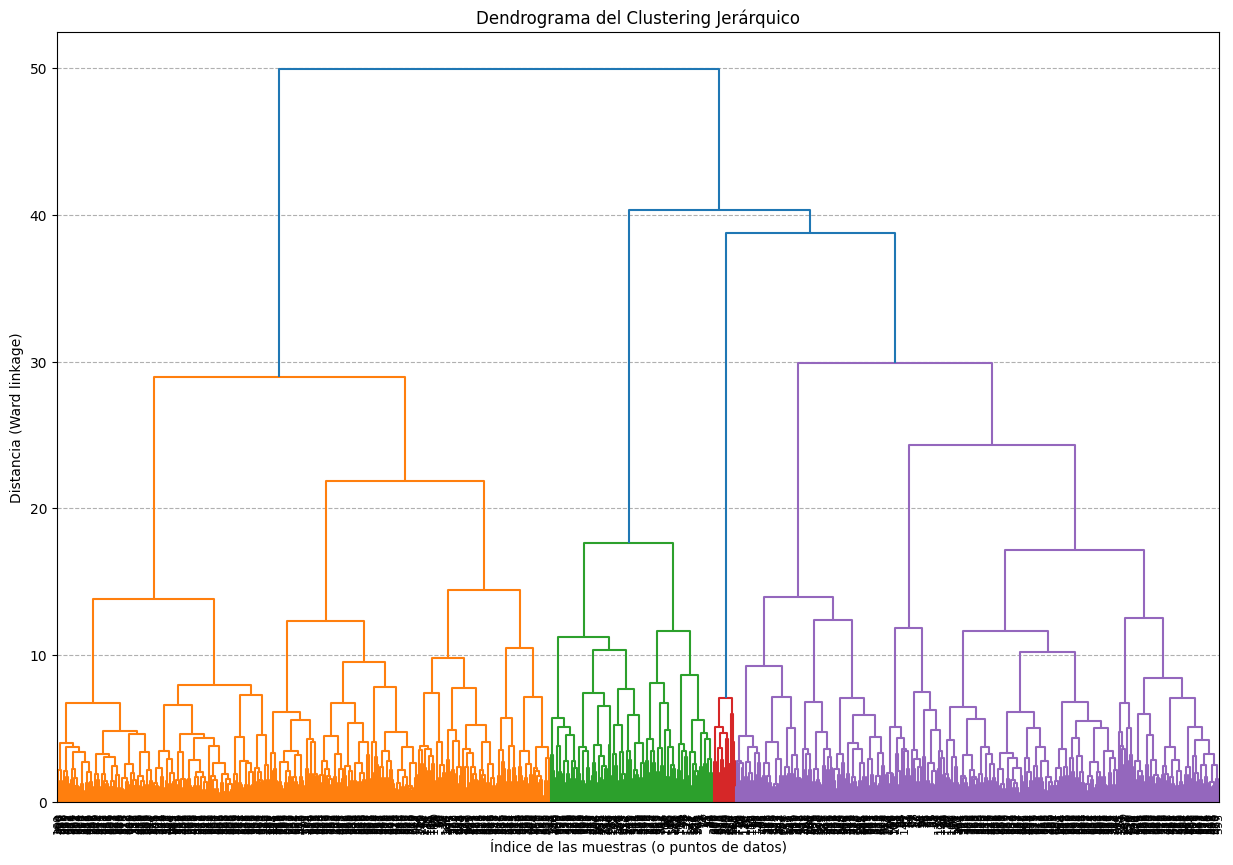


Se ha elegido (tentativamente) n_clusters = 3 para AgglomerativeClustering.
¡Recuerda ajustar este valor después de analizar tu dendrograma!

Modelo AgglomerativeClustering entrenado con 3 clústeres.

Primeras filas del DataFrame con los datos (escalados) y las etiquetas del clustering jerárquico:
   footfall  tempMode        AQ       USS        CS       VOC        RP  \
0 -0.283153  1.222896  1.860497 -1.402480  0.477610  1.389813 -0.672788   
1 -0.107558 -1.019410 -0.921775  0.043660 -0.310613 -0.810763 -1.647540   
2 -0.254504  1.222896 -1.617343 -0.679410  0.477610 -0.810763 -1.403852   
3 -0.206446  0.101743 -0.921775  0.766730 -0.310613 -0.810763 -1.160164   
4  0.308326  1.222896  0.469361  2.212869 -1.098836 -1.250878  1.276716   

         IP  Temperature  cluster_jerarquico  
0 -0.979504    -2.567407                   1  
1 -0.353894    -2.567407                   0  
2  0.897327    -2.567407                   0  
3  0.897327    -2.567407                   0  
4  0.897327   

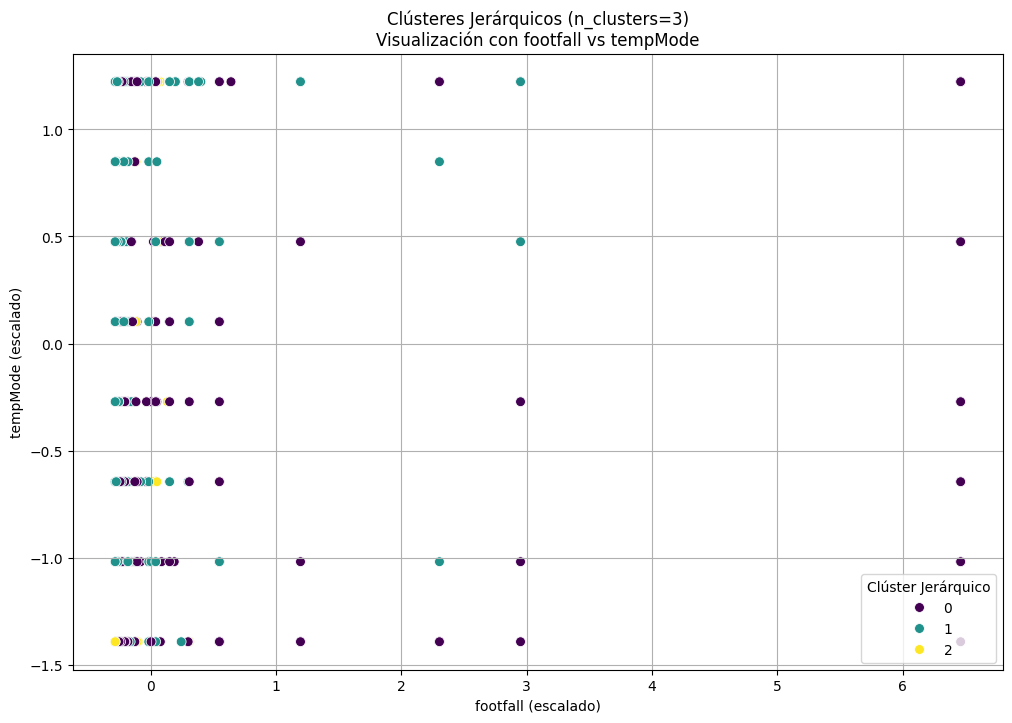

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns

if 'X' not in locals():
    print("ERROR: La variable 'X' con los datos escalados no está definida.")
    print("Asegúrate de haber ejecutado el preprocesamiento y escalado de datos en celdas anteriores.")
    print("Por ejemplo, X = df_scaled")
    raise NameError("Variable X no definida. Ejecuta el escalado de datos primero.")
else:
    print("Usando la variable X existente (datos escalados) para Clustering Jerárquico.")


print("\nGenerando el dendrograma...")
plt.figure(figsize=(15, 10))
plt.title("Dendrograma del Clustering Jerárquico")
plt.xlabel("Índice de las muestras (o puntos de datos)")
plt.ylabel("Distancia (Ward linkage)")

linked_matrix = shc.linkage(X.values if isinstance(X, pd.DataFrame) else X, method='ward')

dendrogram = shc.dendrogram(linked_matrix,
                            orientation='top',
                            show_leaf_counts=False,
                            leaf_rotation=90.,
                            leaf_font_size=8.)
plt.grid(axis='y', linestyle='--')
plt.show()


n_clusters_jerarquico_elegido = 3

print(f"\nSe ha elegido (tentativamente) n_clusters = {n_clusters_jerarquico_elegido} para AgglomerativeClustering.")
print("¡Recuerda ajustar este valor después de analizar tu dendrograma!")

hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_jerarquico_elegido, metric='euclidean', linkage='ward')

hierarchical_model.fit(X.values if isinstance(X, pd.DataFrame) else X)

labels_hierarchical = hierarchical_model.labels_

print(f"\nModelo AgglomerativeClustering entrenado con {n_clusters_jerarquico_elegido} clústeres.")

df_hierarchical_result = X.copy()
df_hierarchical_result['cluster_jerarquico'] = labels_hierarchical

print("\nPrimeras filas del DataFrame con los datos (escalados) y las etiquetas del clustering jerárquico:")
print(df_hierarchical_result.head())

if X.shape[1] >= 2:
    variable_x_h_plot = X.columns[0]
    variable_y_h_plot = X.columns[1]

    print(f"\nVisualizando clústeres jerárquicos usando las variables: '{variable_x_h_plot}' y '{variable_y_h_plot}'")
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_hierarchical_result, x=variable_x_h_plot, y=variable_y_h_plot, hue='cluster_jerarquico', palette='viridis', s=50)
    plt.title(f'Clústeres Jerárquicos (n_clusters={n_clusters_jerarquico_elegido})\nVisualización con {variable_x_h_plot} vs {variable_y_h_plot}')
    plt.xlabel(f"{variable_x_h_plot} (escalado)")
    plt.ylabel(f"{variable_y_h_plot} (escalado)")
    plt.legend(title='Clúster Jerárquico')
    plt.grid(True)
    plt.show()
else:
    print("\nNo hay suficientes características (se necesitan al menos 2) para generar un scatter plot 2D.")

## Análisis

Basándose en los resultados preliminares, K-Means (con k ≈ 4) y el Clustering Jerárquico (con k = 3) parecen los métodos más prometedores, ya que lograron segmentar los datos en múltiples grupos. DBSCAN, con los parámetros eps=1.5 y min_samples=18, resultó en un solo clúster y una gran cantidad de ruido (483 puntos), lo que indica una pobre adaptación a la estructura de densidad de los datos con esta configuración; sería necesario un ajuste fino de eps basado en el gráfico de k-distancia para una evaluación concluyente de DBSCAN.

## Artículos de investigación

## Artículo 1
- Título: Cluster analysis application to identify groups of individuals with high health expenditures

- Autores: Agterberg, J., Zhong, F., Crabb, R., & Rosenberg, M.

- Revista: Health Services and Outcomes Research Methodology

- Año: 2020

- Enlace: https://www.semanticscholar.org/paper/Cluster-analysis-application-to-identify-groups-of-Agterberg-Zhong/aac9d616ab78b2d66b33b0fa6da0487c74a24a88

- Objetivo:
El objetivo principal de la investigación es identificar perfiles característicos o grupos de individuos que son altos utilizadores de los servicios de salud, basándose en sus datos demográficos, económicos y relacionados con la salud. Buscan diferenciar a los individuos con gastos de salud altos de aquellos con gastos bajos.

- Técnicas de agrupamiento empleadas:
Los autores comparan y demuestran la efectividad de dos métodos principales de clustering:

- K-means: Un algoritmo de particionamiento comúnmente utilizado.
Partitioning Around Medoids (PAM): Un algoritmo de k-medoids. El resumen también menciona que aplicaron "hierarchical density-based spatial clustering of applications with noise (HDBScan)" para detectar clusters en una parte del análisis, aunque el foco comparativo está en K-means y PAM.

- Principales resultados de la aplicación y de la investigación: Los algoritmos de clustering pueden producir resultados significativos y útiles para identificar grupos de altos utilizadores de servicios de salud.
Incluir comorbilidades (presencia de múltiples enfermedades o condiciones) en la formación de los clusters mejora la capacidad de separar el grupo de más alto gasto del resto.
Los clusters formados basados en características de los individuos, y no solo en variables específicas, pueden ser predictivos.
Demostraron la consistencia de sus resultados a través de tres cohortes de datos diferentes y distintos tipos de gastos en salud.

## Artículo 2

- Título: Cluster analysis application for understanding SME manufacturing strategies

- Autores: Lorentz, H., Hilmola, O. P., Malmsten, J., & Srai, J. S.

- Revista: Expert Systems with Applications

- Año: 2016

- Enlace: https://www.researchgate.net/publication/308044700_Cluster_Analysis_Application_for_Understanding_SME_Manufacturing_Strategies

- Objetivo:
La investigación tiene como objetivo identificar y comprender las diferentes configuraciones de estrategias de manufactura en pequeñas y medianas empresas (PYMEs) dentro de una economía desarrollada pequeña (Finlandia). Exploran cómo estas configuraciones estratégicas afectan la estabilidad del negocio y el rendimiento, especialmente durante un período de shock macroeconómico.

- Técnicas de agrupamiento empleadas: Two-step Cluster Analysis (Análisis de conglomerados en dos fases): Este método se utiliza para agrupar a las PYMEs encuestadas en distintos clusters basados en sus prioridades estratégicas de manufactura.

- Principales resultados de la aplicación y de la investigación:Se identificaron tres configuraciones distintas de estrategias de manufactura entre las PYMEs del sector manufacturero finlandés: "Responsive niche-innovators" (Innovadores de nicho responsivos), "Subcontractors" (Subcontratistas), y "Engineer-servers" (Ingenieros-servidores).

- Se estableció un vínculo entre estas configuraciones estratégicas y la estabilidad y el rendimiento del negocio.

- El cluster con mejor rendimiento durante el shock macroeconómico fue el de los "Engineer-servers", que enfatizaban una línea de productos amplia orientada a la flexibilidad y el servicio postventa, con menor prioridad en el bajo precio y la flexibilidad de volumen.

- Los resultados apoyan la conclusión de que la naturaleza de las taxonomías de las estrategias de manufactura está impulsada por el contexto del negocio.